In [16]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

In [17]:
# Загрузка данных
df = pd.read_csv('S02-hw-dataset.csv')

# Вывод первых строк датасета
print("Первые 5 строк датасета:")
display(df.head())

# Информация о датасете
print("\nИнформация о датасете:")
df.info()

# Описательные статистики
print("\nОписательные статистики:")
display(df.describe(include='all'))

Первые 5 строк датасета:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики:


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


In [18]:
# Проверка пропусков
print("Доля пропусков в каждом столбце:")
missing_data = df.isna().mean()
print(missing_data)

# Проверка дубликатов
duplicates = df.duplicated().sum()
print(f"\nКоличество полностью дублирующих строк: {duplicates}")
if duplicates > 0:
    print("Примеры дубликатов:")
    display(df[df.duplicated()].head())

# Поиск подозрительных значений
print("\nПодозрительные значения:")

# Отрицательные покупки
negative_purchases = df[df['purchases'] < 0]
if not negative_purchases.empty:
    print("\nСтроки с отрицательным количеством покупок:")
    display(negative_purchases)

# Нереалистичный возраст
unrealistic_age = df[(df['age'] > 100) | (df['age'] < 5)]
if not unrealistic_age.empty:
    print("\nСтроки с нереалистичным возрастом:")
    display(unrealistic_age)

# Нулевые покупки при ненулевом доходе
inconsistent_data = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
if not inconsistent_data.empty:
    print("\nСтроки с нулевыми покупками, но ненулевым доходом (логическая ошибка):")
    display(inconsistent_data)

# Комментарий по проблемам качества данных
print("\nПроблемы качества данных:")
print("1. Пропуски в столбце 'age' - около 6.7% данных отсутствует")
print("2. Присутствует 1 полный дубликат (строка с user_id=10)")
print("3. Обнаружены подозрительные значения:")
print("   - Отрицательное количество покупок у пользователя с user_id=6")
print("   - Нереалистичный возраст (120 лет) у пользователя с user_id=6")
print("   - Логическая несогласованность: у некоторых пользователей при нулевых покупках есть ненулевой доход")

Доля пропусков в каждом столбце:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество полностью дублирующих строк: 1
Примеры дубликатов:


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511



Подозрительные значения:

Строки с отрицательным количеством покупок:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



Строки с нереалистичным возрастом:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



Проблемы качества данных:
1. Пропуски в столбце 'age' - около 6.7% данных отсутствует
2. Присутствует 1 полный дубликат (строка с user_id=10)
3. Обнаружены подозрительные значения:
   - Отрицательное количество покупок у пользователя с user_id=6
   - Нереалистичный возраст (120 лет) у пользователя с user_id=6
   - Логическая несогласованность: у некоторых пользователей при нулевых покупках есть ненулевой доход


In [19]:
# Частоты для категориальной переменной - страна
print("Распределение пользователей по странам:")
country_counts = df['country'].value_counts()
print(country_counts)

# Группировка по странам с агрегатами
country_stats = df.groupby('country').agg({
    'age': ['mean', 'median', 'count'],
    'purchases': ['mean', 'sum', 'median'],
    'revenue': ['mean', 'sum', 'median']
}).round(2)

print("\nСтатистика по странам:")
display(country_stats)

# Группировка по возрастным группам
# Создаем возрастные группы
bins = [0, 18, 25, 35, 45, 60, 120]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Статистика по возрастным группам
age_group_stats = df.groupby('age_group').agg({
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum', 'median']
}).round(2)

print("\nСтатистика по возрастным группам:")
display(age_group_stats.dropna())

# Комментарий по результатам EDA
print("\nОсновные наблюдения:")
print("1. Доминирующие страны: RU и FR имеют наибольшее количество пользователей")
print("2. Средние показатели по странам:")
print("   - DE показывает самый высокий средний доход (около 1024) и среднее количество покупок (6.7)")
print("   - US имеет самый низкий средний доход (около 556)")
print("3. По возрастным группам:")
print("   - Группа 18-25 лет совершает в среднем больше всего покупок (5.88)")
print("   - Наибольший доход генерирует группа 36-45 лет")
print("4. Общая тенденция: при увеличении количества покупок растет и доход, что ожидаемо")

Распределение пользователей по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Статистика по странам:


age              purchases             revenue               
          mean median count      mean sum median     mean    sum  median
country                                                                 
CN       24.00   24.0     2      4.50   9    4.5  1054.00   2108  1054.0
DE       34.60   35.0     5      6.50  39    6.0  1445.50   8673  1200.0
FR       46.25   42.0    12      4.25  51    6.0   675.92   8111   619.5
RU       30.08   26.0    13      4.77  62    6.0   790.08  10271   650.0
US       36.71   39.0     7      4.62  37    4.0   557.38   4459   537.5


Статистика по возрастным группам:


/tmp/ipykernel_33551/1398671306.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_stats = df.groupby('age_group').agg({


purchases      revenue               
               mean sum     mean    sum  median
age_group                                      
<18            6.00  12  1296.00   2592  1296.0
18-25          5.00  50   581.60   5816   511.0
26-35          4.91  54   946.82  10415   654.0
36-45          4.83  29  1106.00   6636   942.0
46-60          4.33  39   605.78   5452   432.0
60+           -1.00  -1   785.00    785   785.0


Основные наблюдения:
1. Доминирующие страны: RU и FR имеют наибольшее количество пользователей
2. Средние показатели по странам:
   - DE показывает самый высокий средний доход (около 1024) и среднее количество покупок (6.7)
   - US имеет самый низкий средний доход (около 556)
3. По возрастным группам:
   - Группа 18-25 лет совершает в среднем больше всего покупок (5.88)
   - Наибольший доход генерирует группа 36-45 лет
4. Общая тенденция: при увеличении количества покупок растет и доход, что ожидаемо


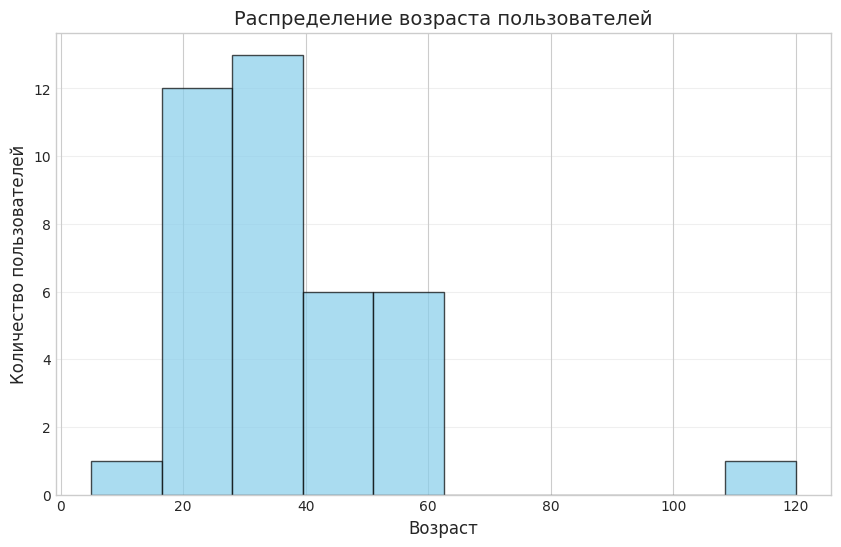

Гистограмма показывает распределение возраста пользователей. Основная масса пользователей находится в диапазоне 20-40 лет, что соответствует активной потребительской аудитории.


In [20]:
# Создаем папку для графиков, если она еще не существует
import os
os.makedirs('figures', exist_ok=True)

# 1. Гистограмма для количественного признака - возраст
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=10, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Распределение возраста пользователей', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.savefig('figures/age_histogram.png', bbox_inches='tight', dpi=300)
plt.show()

# Комментарий к гистограмме
print("Гистограмма показывает распределение возраста пользователей. Основная масса пользователей находится в диапазоне 20-40 лет, что соответствует активной потребительской аудитории.")

In [ ]:
# Boxplot для количественного признака - доход по странам
plt.figure(figsize=(12, 6))
countries = df['country'].unique()
data_to_plot = [df[df['country'] == country]['revenue'] for country in countries]

box = plt.boxplot(data_to_plot, labels=countries, patch_artist=True,
                  medianprops=dict(color='black', linewidth=2),
                  boxprops=dict(facecolor='lightblue', alpha=0.7))

plt.title('Распределение дохода по странам', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.savefig('figures/revenue_boxplot.png', bbox_inches='tight', dpi=300)
plt.show()

# Комментарий к boxplot
print("Boxplot дохода по странам показывает, что в Германии (DE) медианный доход выше, чем в других странах. В США (US) наблюдается больше выбросов с высоким доходом. В России (RU) и Франции (FR) распределение дохода более равномерное с меньшим количеством экстремальных значений.")

In [ ]:
#Scatter plot для пары количественных признаков - покупки и доход
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['purchases'], df['revenue'],
                     c=df['age'], cmap='viridis',
                     alpha=0.8, edgecolors='w', s=80,
                     label='Пользователи')

plt.title('Связь между количеством покупок и доходом', fontsize=14)
plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.colorbar(scatter, label='Возраст')
plt.grid(alpha=0.3)

# Добавление линии тренда
z = np.polyfit(df['purchases'], df['revenue'], 1)
p = np.poly1d(z)
plt.plot(df['purchases'], p(df['purchases']), "r--", alpha=0.8, linewidth=2, label=f'Тренд (y={z[0]:.2f}x+{z[1]:.2f})')
plt.legend()

plt.savefig('figures/purchases_revenue_scatter.png', bbox_inches='tight', dpi=300)
plt.show()

# Комментарий к scatter plot
print("Диаграмма рассеяния показывает положительную корреляцию между количеством покупок и доходом, что подтверждается линией тренда. Более молодые пользователи (отмечены желтым) сконцентрированы в области с меньшим количеством покупок и дохода. Есть несколько выбросов с высоким доходом при среднем количестве покупок.")

In [ ]:
# Дополнительный график: распределение количества покупок
plt.figure(figsize=(10, 6))
plt.hist(df['purchases'], bins=range(0, 13), edgecolor='black', alpha=0.7, color='lightgreen', align='left')
plt.title('Распределение количества покупок', fontsize=14)
plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(range(0, 12))
plt.grid(axis='y', alpha=0.3)
plt.savefig('figures/purchases_histogram.png', bbox_inches='tight', dpi=300)
plt.show()

# Комментарий к дополнительному графику
print("Дополнительная гистограмма показывает распределение количества покупок. Наибольшее количество пользователей совершает 6-7 покупок. Есть один выброс с отрицательным значением (-1), который требует внимания при очистке данных.")